# アンサンブル学習:  アダブースト

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris, make_moons
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')


%matplotlib inline

## Data Preparation

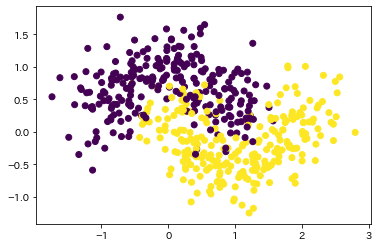

In [2]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)

## AdaBoostClassifier

### 決定木でアンサンブル

In [3]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                               n_estimators=200,
                               algorithm='SAMME.R',
                               learning_rate=0.5)

ada_boost.fit(X_train, y_train)

accuracy_score(y_test, ada_boost.predict(X_test))

0.888

### LogisticRegressionでアンサンブル

In [4]:
# 決定木じゃなくてももちろんOK
ada_boost = AdaBoostClassifier(LogisticRegression(),
                               n_estimators=200,
                               algorithm='SAMME.R',
                               learning_rate=0.5)

ada_boost.fit(X_train, y_train)

train_acc = accuracy_score(y_train, ada_boost.predict(X_train))
test_acc = accuracy_score(y_test, ada_boost.predict(X_test))

print(f'{train_acc:.3f}, {test_acc:.3f}')

0.848, 0.824


### SVMでアンサンブル

In [5]:
# 決定木じゃなくてももちろんOK
ada_boost = AdaBoostClassifier(SVC(probability=True),
                               n_estimators=200,
                               algorithm='SAMME.R',
                               learning_rate=0.1)

ada_boost.fit(X_train, y_train)

train_acc = accuracy_score(y_train, ada_boost.predict(X_train))
test_acc = accuracy_score(y_test, ada_boost.predict(X_test))

print(f'{train_acc:.3f}, {test_acc:.3f}')

0.941, 0.896


### 決定木の深さパラメータをいじる

In [6]:
train_acc_list = []
test_acc_list = []
depth_list = range(1, 11)

train_acc_list = []
test_acc_list = []


for depth in depth_list:
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),
                                   n_estimators=200,
                                   algorithm='SAMME.R',
                                   learning_rate=0.5)

    ada_boost.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, ada_boost.predict(X_train))
    test_acc = accuracy_score(y_test, ada_boost.predict(X_test))

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    print(f'Depth {depth}: {train_acc:.3f}, {test_acc:.3f}')

Depth 1: 0.979, 0.888
Depth 2: 1.000, 0.848
Depth 3: 1.000, 0.848
Depth 4: 1.000, 0.856
Depth 5: 1.000, 0.856
Depth 6: 1.000, 0.856
Depth 7: 1.000, 0.872
Depth 8: 1.000, 0.840
Depth 9: 1.000, 0.848
Depth 10: 1.000, 0.864


Text(0, 0.5, 'Accuracy')

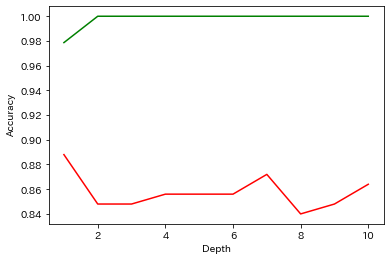

In [7]:
plt.plot(depth_list, train_acc_list, c='g')
plt.plot(depth_list, test_acc_list, c='r')

plt.xlabel('Depth')
plt.ylabel('Accuracy')

### 予測器の数をいじる

In [8]:
n_estimators_list = [1, 5, 10, 50, 100, 200, 500]
train_acc_list = []
test_acc_list = []

for n_estimators in n_estimators_list:
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                   n_estimators=n_estimators,
                                   algorithm='SAMME.R',
                                   learning_rate=0.5)

    ada_boost.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, ada_boost.predict(X_train))
    test_acc = accuracy_score(y_test, ada_boost.predict(X_test))

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    

    print(f'n_estimators {n_estimators}: {train_acc:.3f}, {test_acc:.3f}')    

n_estimators 1: 0.843, 0.752
n_estimators 5: 0.880, 0.792
n_estimators 10: 0.939, 0.864
n_estimators 50: 0.952, 0.904
n_estimators 100: 0.965, 0.904
n_estimators 200: 0.979, 0.888
n_estimators 500: 0.997, 0.856


Text(0, 0.5, 'Accuracy')

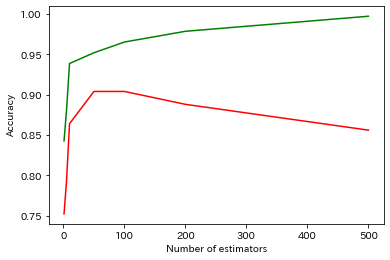

In [9]:
plt.plot(n_estimators_list, train_acc_list, c='g')
plt.plot(n_estimators_list, test_acc_list, c='r')

plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')

## 学習率による決定境界の変化を観察する

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

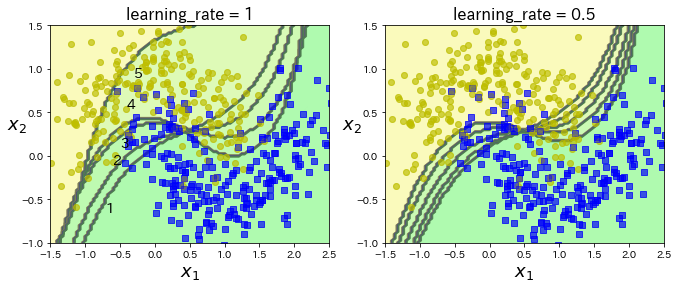

In [11]:
m = len(X_train)


plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)